In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_excel("C:\\Users\\PRACHI PANDEY\\Desktop\\Main_DataSet1.xlsx")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
X = df.iloc[:,[0,5]].values
X[X <= 0] = df['balance'].mean()
df['balance'].mean()

1362.2720576850766

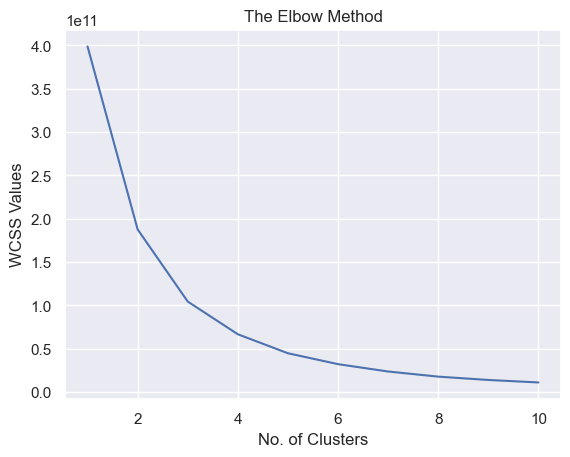

In [4]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#print(wcss)
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [5]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)'''

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX=scaler.fit_transform(X)'

In [14]:
dbscan = DBSCAN(eps=5,min_samples=5)
db = dbscan.fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#df['labels'] = labels
#np.unique(labels)
#df[labels >= 0]
print(n_clusters_)
print(n_noise_)

257
4254


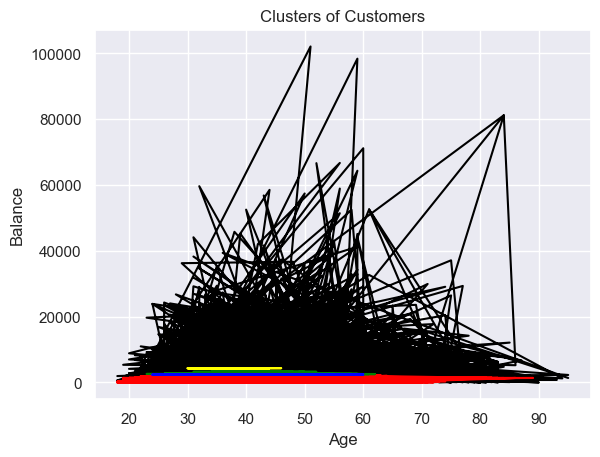

In [15]:
plt.plot(X[labels == -1,0], X[labels== -1,1], color='black')

plt.plot(X[labels == 0,0], X[labels== 0,1],color='red')
plt.plot(X[labels == 1,0], X[labels== 1,1], color='green')
plt.plot(X[labels == 2,0], X[labels== 2,1], color='blue')
plt.plot(X[labels == 3,0], X[labels== 3,1], color='green')
plt.plot(X[labels == 4,0], X[labels== 4,1], color='yellow')

plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Balance")
#plt.legend( plt.legend(["This is my legend"], fontsize="x-large")fontsize="x-large")
plt.show()

For n_clusters = 2, silhouette score is 0.862158731406895
For n_clusters = 3, silhouette score is 0.7967852452436303
For n_clusters = 4, silhouette score is 0.7659515929173378
For n_clusters = 5, silhouette score is 0.7133191969537684


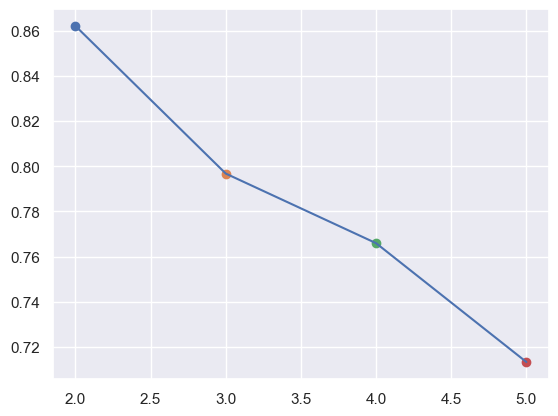

In [8]:
score=[]
i=0
range_n_clusters = [2,3,4,5]
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    y_kmeans = clusterer.fit_predict(X)
    score.append(silhouette_score(X,y_kmeans))
    s = score[i]
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, s))

    #plt.line(n_clusters)
    plt.scatter(n_clusters,score[i])
    i=i+1
plt.plot(range(2,6),score)
plt.show()